# LAB 1 :Compute mean,mediam,mode,SD,variance,range for given numerical value in db. Generate a histogram and box plot to understand the didtrubution of data.identify any other layers in data using IQR. Select a categorical variable from dataset. Compute frequency of each category and display it as a bar chart or pie-chart

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [5]:
ks=pd.read_csv("Titanic-Dataset.csv")
ks

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
ks.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
ks.sum()

PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21205.2
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                     28693.9
dtype: object

In [8]:
data=num_col='Fare'

In [9]:
mean_val=ks[num_col].mean()
print("Mean:",mean_val)

Mean: 32.2042079685746


In [10]:
median_val=ks[num_col].median()
print("Meadian:",median_val)

Meadian: 14.4542


In [11]:
mode_val=ks[num_col].mode()
print("Mode:",mode_val)

Mode: 0    8.05
dtype: float64


In [12]:
range_rate=ks[num_col].max()-ks[num_col].min()
print("Range Rate:",range_rate)

Range Rate: 512.3292


In [13]:
sd=ks[num_col].std()
print("Standard Deviation:",sd)

Standard Deviation: 49.693428597180905


In [14]:
variance=ks[num_col].var()
print("Variance:",variance)

Variance: 2469.436845743117


In [1]:
pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\admin\anaconda3\lib\site-packages (0.10.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


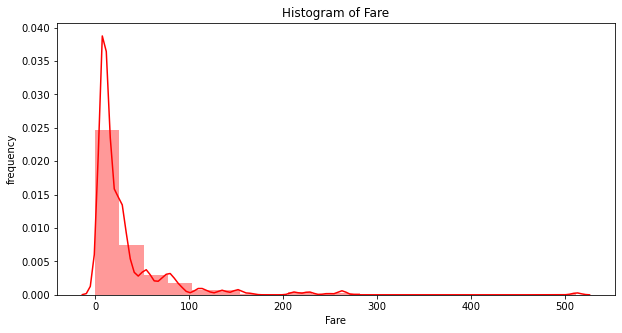

In [19]:
plt.figure(figsize=(10,5))
sb.distplot(ks[num_col], bins=20, kde=True, color='red') 
plt.title(f"Histogram of {num_col}")
plt.xlabel(num_col)
plt.ylabel("frequency")
plt.show()


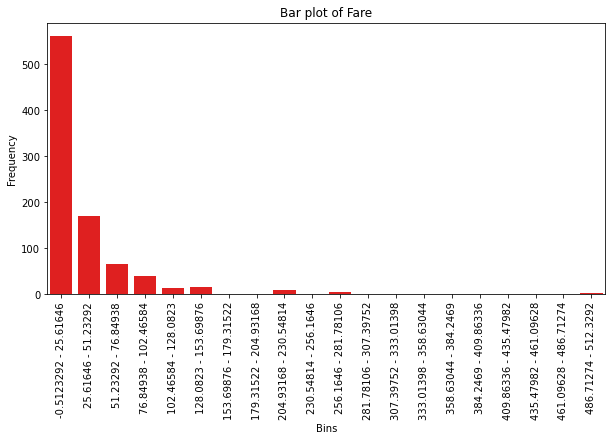

In [20]:
counts, bin_edges = pd.cut(ks[num_col], bins=20, retbins=True)
count_values = counts.value_counts(sort=False)

df_bins = pd.DataFrame({
    'bin_range': [f'{bin_edges[i]} - {bin_edges[i+1]}' for i in range(len(bin_edges)-1)],
    'count': count_values.values
})

plt.figure(figsize=(10,5))
sb.barplot(x='bin_range', y='count', data=df_bins, color='red')
plt.title(f"Bar plot of {num_col}")
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # To make the bin labels readable
plt.show()

In [23]:
Q1=ks[num_col].quantile(0.25)
Q3=ks[num_col].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=ks[(ks[num_col]<lower_bound)|(ks[num_col]<upper_bound)]
print(f"Outliers in the dataset:")
print(outliers[num_col])

Outliers in the dataset:
0       7.2500
2       7.9250
3      53.1000
4       8.0500
5       8.4583
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 775, dtype: float64


In [24]:
categorical_data='Survived'

In [27]:
catcount=ks[categorical_data].value_counts()
catcount

0    549
1    342
Name: Survived, dtype: int64

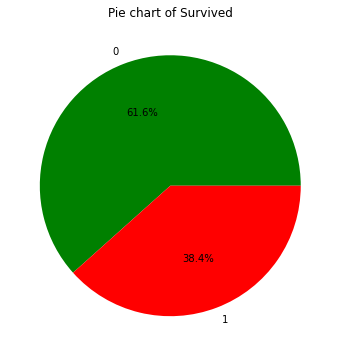

In [38]:
plt.figure(figsize=(6,6))
plt.pie(catcount, labels=catcount.index, autopct='%1.1f%%', colors=['green','red'])
plt.title(f"Pie chart of {categorical_data}")
plt.show()


# LAB 2

In [3]:
data1=pd.read_csv('iris.data.csv',header=None)
data1

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data1.columns=['sepal_l','sepal_w','petal_l','petal_w','species']
data1.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data1.isnull().sum()

sepal_l    0
sepal_w    0
petal_l    0
petal_w    0
species    0
dtype: int64

In [6]:
col1='sepal_l'
col2='sepal_w'


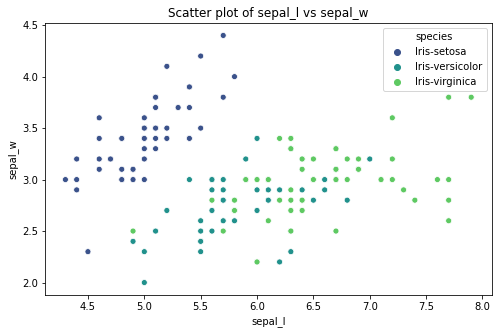

In [8]:
plt.figure(figsize=(8,5))
sb.scatterplot(x=data1[col1],y=data1[col2],hue=data1['species'],palette='viridis')
plt.title(f'Scatter plot of {col1} vs {col2}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

In [9]:
pear_cor=data1[col1].corr(data1[col2])
pear_cor

-0.10936924995064937

In [10]:
cor_mat=data1[[col1,col2]].cov()
cor_mat

,sepal_l,sepal_w
sepal_l,0.685694,-0.039268
sepal_w,-0.039268,0.188004


In [11]:
cor_mat1=data1[[col1,col2,'petal_l','petal_w']].cov()
cor_mat1

,sepal_l,sepal_w,petal_l,petal_w
sepal_l,0.685694,-0.039268,1.273682,0.516904
sepal_w,-0.039268,0.188004,-0.321713,-0.117981
petal_l,1.273682,-0.321713,3.113179,1.296387
petal_w,0.516904,-0.117981,1.296387,0.582414


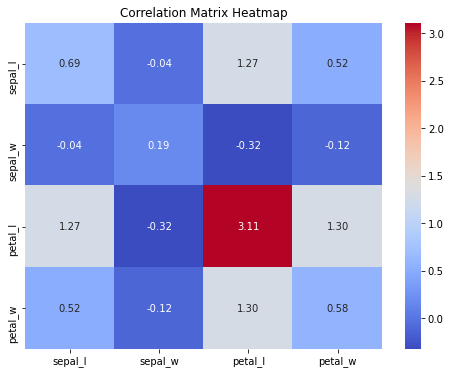

In [13]:
plt.figure(figsize=(8,6))
sb.heatmap(cor_mat1,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# LAB 3 PCA

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
kn=pd.read_csv("iris.data.csv")
kn

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
kn.columns=['sepal_l','sepal_w','petal_l','petal_w','species']
kn.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [29]:
df1=kn.drop(columns="species")

In [30]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df1)
X_scaled

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ],
       [-1.51163569,  0.8077768 , -1.35396443, -1.19326436],
       [-1.02726211,  0.8077768 , -1.29694332, -1.32506301],
       [-1.75382249, -0.34951881, -1.35396443, -1.32506301],
       [-1.1483555 ,  0.11339944, -1.29694332, -1.45686167],
       [-0.54288852,  1.50215416, -1.29694332, -1.32506301],
       [-1.2694489 ,  0.8077768 , -1.23992221, -1.32506301],
       [-1.2694489 , -0.11805969, -1.35396443, -1.45686167],
       [-1.87491588, -0.11805969, -1.52502777, -1.45686167],
       [-0.05851493,  2.19653152, -1.46800666, -1.32506301],
       [-0.17960833,  3.122368  , -1.29694332, -1.0614657 ],
       [-0.54288852,  1.9650724 , -1.41098555, -1.0614657 ],
       [-0.90616871,  1.

In [32]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
X_pca

array([[-2.10795032, -0.64427554],
       [-2.38797131, -0.30583307],
       [-2.32487909, -0.56292316],
       [-2.40508635,  0.687591  ],
       [-2.08320351,  1.53025171],
       [-2.4636848 ,  0.08795413],
       [-2.25174963,  0.25964365],
       [-2.3645813 , -1.08255676],
       [-2.20946338, -0.43707676],
       [-2.17862017,  1.08221046],
       [-2.34525657,  0.17122946],
       [-2.24590315, -0.6974389 ],
       [-2.66214582, -0.92447316],
       [-2.2050227 ,  1.90150522],
       [-2.25993023,  2.73492274],
       [-2.21591283,  1.52588897],
       [-2.20705382,  0.52623535],
       [-1.9077081 ,  1.4415791 ],
       [-2.35411558,  1.17088308],
       [-1.93202643,  0.44083479],
       [-2.21942518,  0.96477499],
       [-2.79116421,  0.50421849],
       [-1.83814105,  0.11729122],
       [-2.24572458,  0.17450151],
       [-1.97825353, -0.59734172],
       [-2.06935091,  0.27755619],
       [-2.18514506,  0.56366755],
       [-2.15824269,  0.34805785],
       [-2.28843932,

In [42]:
cd=pd.DataFrame(X_pca,columns=['PCA1','PCA2'])
cd.head(2)

,PCA1,PCA2
0,-2.107950,-0.644276
1,-2.387971,-0.305833


In [43]:
cd['species'] = kn['species']
cd['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: species, Length: 149, dtype: object

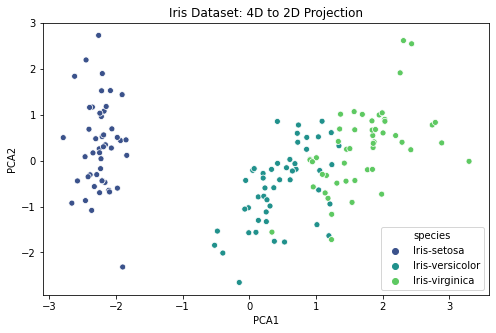

In [48]:
plt.figure(figsize=(8, 5))
sb.scatterplot(x='PCA1', y='PCA2', hue='species', data=cd, palette='viridis')
plt.title('Iris Dataset: 4D to 2D Projection')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

print('Variance ratio:',pca.explained_variance_ratio_)

# lab 4 KNN

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.datasets import load_iris

In [20]:
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
x=data.data
y=data.target
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [22]:
std_scalar=StandardScaler()
x_scaled=std_scalar.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
def evaluate_knn(k_values,weighted='False'):
    results=[]
    for k in k_values:
        if weighted:
            model=KNeighborsClassifier(n_neighbors=k,weights='distance')
        else:
            model=KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        acc=accuracy_score(y_test,y_pred)
        f1=f1_score(y_test,y_pred,average='weighted')
        results.append((k,acc,f1))
        print(f"k=(k)|Accuracy:{acc:4f}|F1-score{f1:.4f}")
    return results

In [25]:
k_values=[1,3,5]
print("\n Regular KNN Results")
regular_knn_result=evaluate_knn(k_values,weighted='uniform')
print("\n weighted knn results")
weighted_knn_result=evaluate_knn(k_values,weighted=True)


 Regular KNN Results
k=(k)|Accuracy:1.000000|F1-score1.0000
k=(k)|Accuracy:1.000000|F1-score1.0000
k=(k)|Accuracy:1.000000|F1-score1.0000

 weighted knn results
k=(k)|Accuracy:1.000000|F1-score1.0000
k=(k)|Accuracy:1.000000|F1-score1.0000
k=(k)|Accuracy:1.000000|F1-score1.0000


# LAB 5 LWR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
x=df[['RM']].values
y=df['MEDV'].values

In [4]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [5]:
def get_weights(x_train,query_point,tau):
    return np.exp(-np.sum((x_train-query_point)**2,axis=1)/(2*tau**2))

In [6]:
def locally_weighted_regression(x_train,y_train,tau,x_test):
    y_pred=[]
    for x in x_test:
        weights=get_weights(x_train,x,tau)
        W=np.diag(weights)
        x_bias=np.c_[np.ones(x_train.shape[0]),x_train]
        theta=np.linalg.pinv(x_bias.T @ W @ x_bias)@(x_bias.T @ W @ y_train)
        x_bias=np.array([1,x[0]])
        y_pred.append(x_bias @ theta)
    return np.array(y_pred)

In [7]:
x_test=np.linspace(min(x_scaled),max(x_scaled),100).reshape(-1,1)
tau_values=[0.1,0.5,1.0]

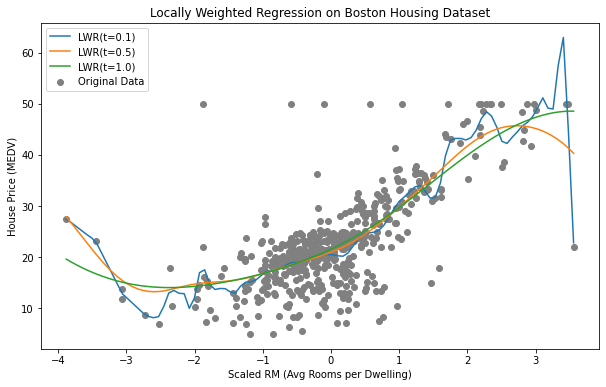

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(x_scaled,y,color='gray',label='Original Data')
for tau in tau_values:
    y_pred=locally_weighted_regression(x_scaled,y,tau,x_test)
    plt.plot(x_test,y_pred,label=f'LWR(t={tau})')
plt.xlabel('Scaled RM (Avg Rooms per Dwelling)')
plt.ylabel('House Price (MEDV)')
plt.title('Locally Weighted Regression on Boston Housing Dataset')
plt.legend()
plt.show()

# LAB 6 Linear regression and auto mpg dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
df_boston=pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


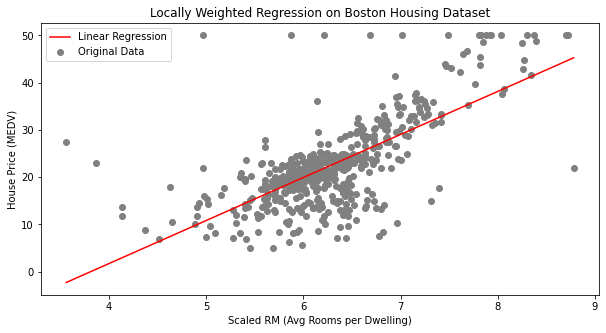

In [11]:
x_boston=df_boston[['RM']].values
y_boston=df_boston['MEDV'].values
model_linear=LinearRegression()
model_linear.fit(x_boston,y_boston)

x_test=np.linspace(min(x_boston),max(x_boston),100).reshape(-1,1)
y_pred=model_linear.predict(x_test)
plt.figure(figsize=(10,5))
plt.scatter(x_boston,y_boston,color='gray',label='Original Data')
plt.plot(x_test,y_pred,color='red',label='Linear Regression')
plt.xlabel('Scaled RM (Avg Rooms per Dwelling)')
plt.ylabel('House Price (MEDV)')
plt.title('Locally Weighted Regression on Boston Housing Dataset')
plt.legend()
plt.show()

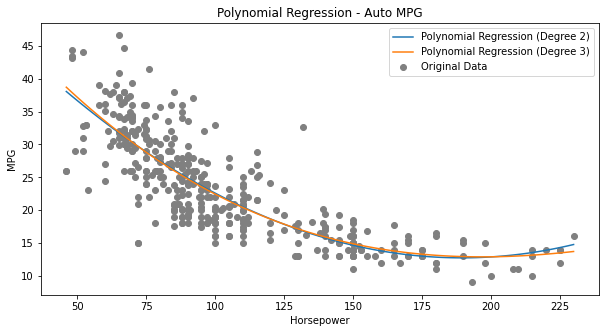

In [12]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
df_mpg = pd.read_csv(url)
df_mpg = df_mpg.dropna()

X_mpg = df_mpg[['horsepower']].values  
y_mpg = df_mpg['mpg'].values  

scaler = StandardScaler()
X_mpg_scaled = scaler.fit_transform(X_mpg)

degrees = [2, 3]
plt.figure(figsize=(10, 5))
plt.scatter(X_mpg, y_mpg, color='gray', label='Original Data')

for d in degrees:
    model_poly = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model_poly.fit(X_mpg_scaled, y_mpg)

    X_test_scaled = scaler.transform(np.linspace(min(X_mpg), max(X_mpg), 100).reshape(-1, 1))
    y_pred_poly = model_poly.predict(X_test_scaled)

    plt.plot(np.linspace(min(X_mpg), max(X_mpg), 100), y_pred_poly, label=f'Polynomial Regression (Degree {d})')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression - Auto MPG')
plt.legend()

# LAB 7 Decision tree

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.preprocessing import LabelEncoder

In [32]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
df=df[['Survived','Pclass','Sex','Age','SibSp','Fare','Embarked']]
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
label_encoder=LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Embarked']=label_encoder.fit_transform(df['Embarked'])
x=df.drop(columns=['Survived'])
y=df['Survived']

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-33-1488a5b65d0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=label_encoder.fit_transform(df['Sex'])
<ipython-input-33-1488a5b65d0d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

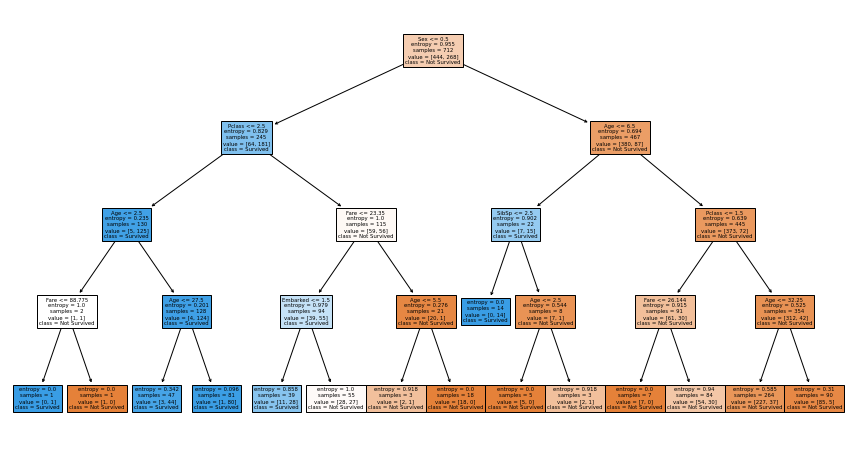

In [35]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
model.fit(x_train,y_train)
plt.figure(figsize=(15,8))
plot_tree(model, feature_names=x.columns,class_names=['Not Survived','Survived'],filled=True)
plt.show()

In [36]:
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1-Score:{f1:.2f}")

print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy:0.80
Precision:0.84
Recall:0.64
F1-Score:0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



# LAB 8 K-means clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df=pd.read_csv("Breast_Cancer.csv")
df.drop(columns=['id'],inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.drop(columns=['Unnamed: 32'], inplace=True)

In [6]:
df.dropna(inplace=True)

X = df.drop(columns=['diagnosis'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [10]:
df['Cluster']= kmeans.labels_

No handles with labels found to put in legend.


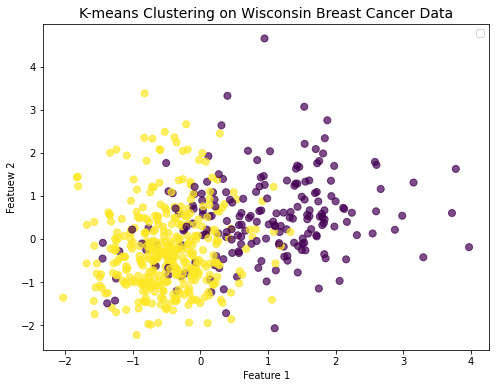

Inertia (within-Cluster Sum of the Squared Distances): 11595.526607115773


In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Featuew 2')
plt.title('K-means Clustering on Wisconsin Breast Cancer Data', fontsize=14)
plt.legend()
plt.show()

print('Inertia (within-Cluster Sum of the Squared Distances):', kmeans.inertia_)

# LAB 9 navies bayes accuracy